In [50]:
import numpy as np 
import matplotlib.pyplot as plt

In [51]:
class RandomAction:
    def __init__(self, n_states=1000, left_reward=-1):
        self.n_states = n_states
        self.left_reward = left_reward
        self.reset()

    def reset(self):
        self.state = self.n_states // 2
        return self.state

    def step(self):
        action = 0
        while action == 0:
            action = np.random.randint(-100, 101)

        self.state += action

        if self.state < 0:
            return self.state, self.left_reward, True
        elif self.state >= self.n_states:
            return self.state, 1, True
        return self.state, 0, False

In [52]:
def state_generalization(state):
    return state // 100

V = np.zeros(1000)
N = np.zeros(1000)

V_g = np.zeros(10)
N_g = np.zeros(10)

log = np.zeros(1000)

episodes = 100000
alpha = 2e-5

FIRST_VISIT = False

In [53]:
env = RandomAction()

for episode in range(episodes):
    state = env.reset()

    states = []
    rewards = []

    done = False

    while not done:
        states.append(state)
        log[state] += 1
        state, reward, done = env.step()
        rewards.append(reward)
        
    G = 0
    for i in reversed(range(len(states))):
        if not FIRST_VISIT or states[i] not in states[:i]:
            G = G + rewards[i]
            N[states[i]] += 1
            V[states[i]] += (G - V[states[i]]) / N[states[i]]

In [54]:
env = RandomAction()

for episode in range(episodes):
    state = env.reset()

    states = []
    rewards = []

    done = False

    while not done:
        states.append(state)
        log[state] += 1
        state, reward, done = env.step()
        rewards.append(reward)
        
    G = 0
    for i in reversed(range(len(states))):
        if not FIRST_VISIT or states[i] not in states[:i]:
            G = G + rewards[i]
            sg = state_generalization(states[i])
            N_g[sg] += 1
            V_g[sg] += alpha * (G - V_g[sg])

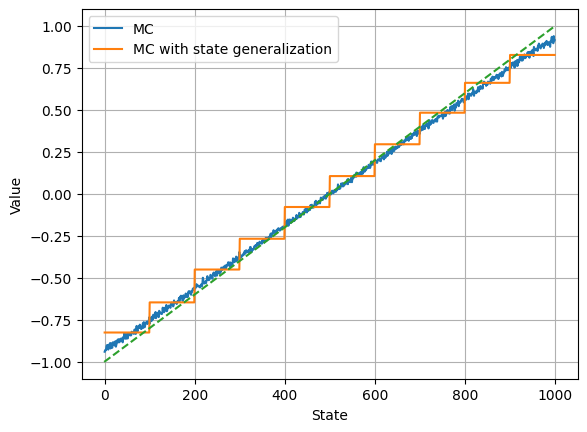

In [67]:
x = np.arange(0, 1000)
plt.plot(x, V, label='MC')
plt.plot(x, V_g[state_generalization(x)], label='MC with state generalization')
plt.plot([-1, 1000], [-1, 1], '--')
plt.legend()
plt.xlabel('State')
plt.ylabel('Value')
plt.grid()
plt.show()

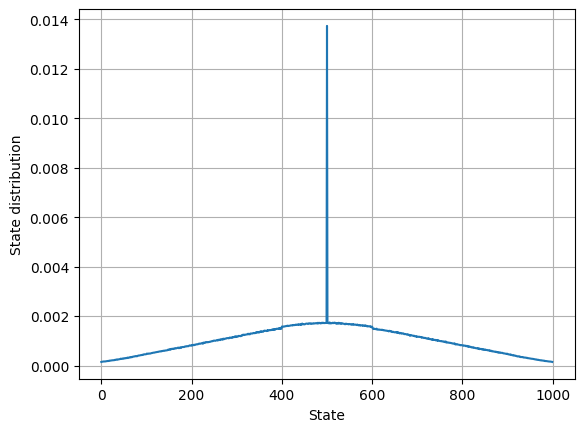

In [65]:
plt.plot(x, log / (sum(log)))
plt.xlabel('State')
plt.ylabel('State distribution')
plt.grid()
plt.show()